In [457]:
import numpy as np
import pandas as pd
from scipy.stats import binned_statistic_2d
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import holoviews as hv
from geojson import Polygon,FeatureCollection,Feature
import folium
from folium import plugins
from branca.element import Figure
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
from IPython.html.widgets import *
from IPython.html.widgets import interact, interactive, fixed

Загружаем подготовленные данные о поездках с предсказаниями

In [65]:
data=pd.read_pickle('data_taxi_pr.pkl')
data.head()

,y,pr,reg,y1,y2,y3,y4,y5,y6
2015-06-01 00:00:00,40.0,28.114450,1075,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2015-06-01 01:00:00,17.0,39.950053,1075,17.357954,0.000000,0.000000,0.000000,0.0,0.0
2015-06-01 02:00:00,5.0,7.365433,1075,10.756136,31.912874,0.000000,0.000000,0.0,0.0
2015-06-01 03:00:00,5.0,-0.303306,1075,8.067900,26.109884,29.949148,0.000000,0.0,0.0
2015-06-01 04:00:00,8.0,4.407931,1075,14.827381,21.095255,31.538309,60.084057,0.0,0.0


In [81]:
ny_minlat=-74.25559
ny_maxlat=-73.70001
ny_minlon=40.49612
ny_maxlon=40.91553
ny_lat=(ny_minlat+ny_maxlat)/2
ny_lon=(ny_minlon+ny_maxlon)/2

In [80]:
regions=pd.read_pickle('regs_new.pkl')
regions.head()

,region,west,east,south,north,polygon
1074,1075,-74.022246,-74.011135,40.697437,40.705825,"[[[-74.0222464, 40.6974368], [-74.0222464, 40...."
1075,1076,-74.022246,-74.011135,40.705825,40.714213,"[[[-74.0222464, 40.705825], [-74.0222464, 40.7..."
1076,1077,-74.022246,-74.011135,40.714213,40.722601,"[[[-74.0222464, 40.7142132], [-74.0222464, 40...."
1124,1125,-74.011135,-74.000023,40.697437,40.705825,"[[[-74.0111348, 40.6974368], [-74.0111348, 40...."
1125,1126,-74.011135,-74.000023,40.705825,40.714213,"[[[-74.0111348, 40.705825], [-74.0111348, 40.7..."


In [82]:
feature_collection=[]
for i,coords in enumerate(regions.polygon.values):
    polygon=Feature(geometry=Polygon(coords),id=i+1)  
    feature_collection.append(polygon)

In [83]:
districts=FeatureCollection(feature_collection)

In [427]:
regs=np.unique(data.reg.values)
months=data.index.map(lambda x: '{}-{}'.format(x.year,x.month))
months=list(np.append('all',np.unique(months)))

In [52]:
data.head()

,y,pr,reg,y1,y2,y3,y4,y5,y6
2015-06-01 00:00:00,40.0,28.114450,1075,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2015-06-01 01:00:00,17.0,39.950053,1075,17.357954,0.000000,0.000000,0.000000,0.0,0.0
2015-06-01 02:00:00,5.0,7.365433,1075,10.756136,31.912874,0.000000,0.000000,0.0,0.0
2015-06-01 03:00:00,5.0,-0.303306,1075,8.067900,26.109884,31.912874,0.000000,0.0,0.0
2015-06-01 04:00:00,8.0,4.407931,1075,14.827381,21.095255,26.109884,31.912874,0.0,0.0


In [66]:
data.to_pickle('data_taxi_pr.pkl')

In [ ]:
def refresh_map():
    map_ny_distr=0
        
    map_ny_distr = folium.Map(location=[ny_lon, ny_lat],zoom_start=11,min_lon=ny_minlat, max_lon=ny_maxlat,
                   max_lat=ny_maxlon, min_lat=ny_minlon)
    return map_ny_distr

In [ ]:
def count_trip(source=0,year=2016,month=1,day=1, hour=0, region='1075'):
    
    
    map_ny_distr=refresh_map()
    
    date='{}-{}-{} {}:00:00'.format(str(year),str(month),str(day),str(hour))
    if source==0:
        try:
            travels= pd.DataFrame(columns=['reg','val'])
            travels['val']=data.y[date].values
            travels['reg']=np.arange(1,len(regs)+1)
        except:
            return print('Date error')
    elif source==1:
        try:
            travels= pd.DataFrame(columns=['reg','val'])
            travels['val']=data.y1[date].values
            travels['reg']=np.arange(1,len(regs)+1)
        except:
            return print('Date error')
    
    ind=np.where(regs==region)[0][0]
    curr=travels.val[ind]
    print('Количество поездок {}'.format(int(curr)))
    
    
    
    map_ny_distr.choropleth(geo_str=districts, data=travels,
             columns=['reg', 'val'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Trips', reset=True,)
    return(map_ny_distr)

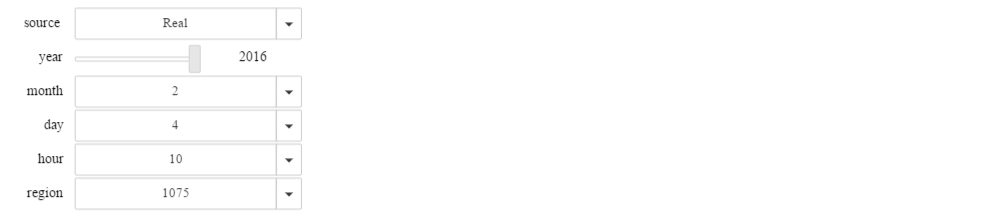

Количество поездок 70


In [435]:
w = interactive(count_trip, source={'Real': 0, 'Predicted': 1}, year=[2015,2016], month=[x+1 for x in range(12)],
               day=[x+1 for x in range(31)], hour=[x for x in range(24)], region=list(np.unique(data.reg.values)))
display(w)

In [ ]:
def plot(region='1075',month='all'):
    if month!='all':
        plt.figure(figsize=(20,10))
        plt.title(month)
        data.y[data.reg==region][month].plot(label='real')
        data.y1[data.reg==region][month].plot(label='predicted')
        plt.legend()
        
    else:    
        plt.figure(figsize=(20,10))
        plt.title('all time')
        data.y[data.reg==region].plot(label='real')
        data.y1[data.reg==region].plot(label='predicted')
        plt.legend()

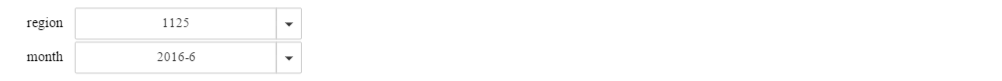

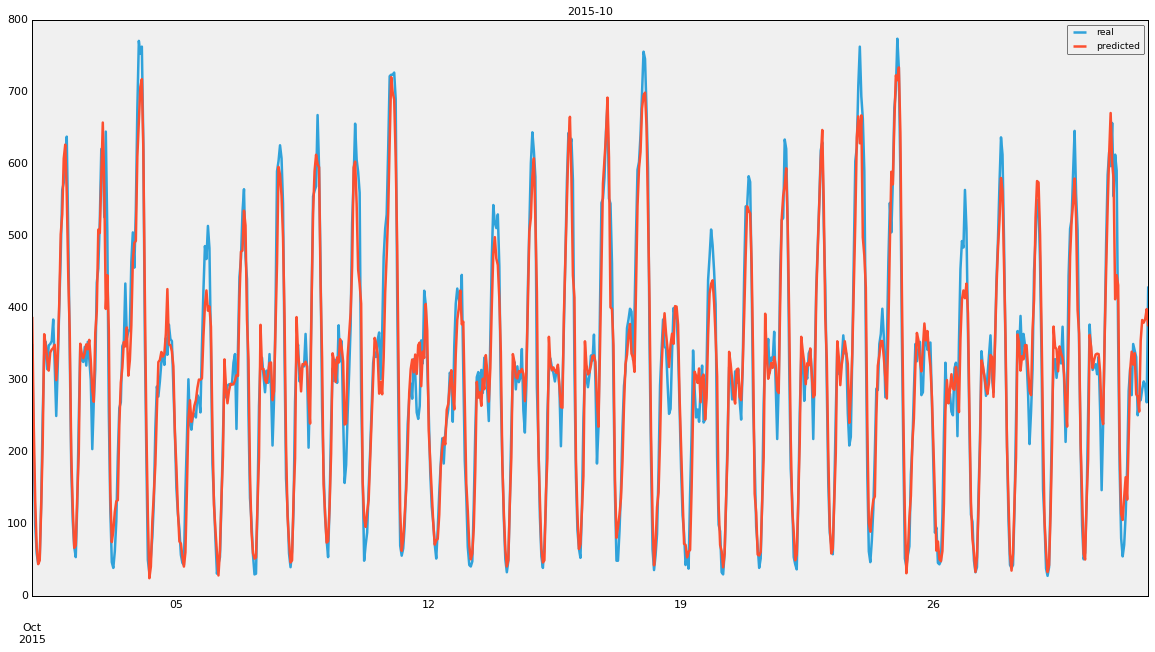

In [453]:
w2 = interactive(plot, region=list(np.unique(data.reg.values)),month=months)
display(w2)